# Particle in a Box

In [16]:
import scipy         # Another numerical library
from scipy import integrate

import matplotlib    # Library used for plotting
import numpy as np   # Numerical library
import matplotlib.pyplot as plt # Plot commands

# Define some colors using the RGB format

CF_red = (204/255, 121/255, 167/255)
CF_vermillion = (213/255, 94/255, 0)
CF_orange = (230/255, 159/255, 0)
CF_yellow = (240/255, 228/255, 66/255)
CF_green = (0, 158/255, 115/255)
CF_sky = (86/255, 180/255, 233/255)
CF_blue = (0, 114/255, 178/255)
CF_black = (0, 0, 0)

## Particles as Waves

Particle-wave duality is a familiar concept to the 21st century folk. In one dimension, particles obey the 1D Schr&ouml;dinger equation

$$
i\hbar\partial_t\Psi(x, t) = \hat{H}\Psi(x, t)\,.
$$

For a particle in a 1D potential well, $\hat{H} = -\hbar^2/(2m) \partial_x^2 + V(x)$, where $V(x)$ is the potential energy. Inside the box, $V(x) = 0$; outside the box, $V(x) = \infty$. Within the box, the Schr&ouml;dinger equation becomes

$$
i\hbar\partial_t\Psi(x, t) = -\frac{\hbar^2}{2m}\partial_x^2\Psi(x, t)\,.
$$
Writing $\Psi(x, t) = X(x)T(t)$ yields

$$
i\hbar X(x)T'(t) = -\frac{\hbar^2}{2m}X''(x)T(t)\rightarrow 
i\frac{2m}{\hbar} \frac{T'(t)}{T(t)} = -\frac{X''(x)}{X(x)} = k^2\,.
$$
Solving for $X(x)$ and $T(t)$, we have

$$
X_k(x) = A_k \cos(k x) + B_k \sin(k x)
$$
and
$$
T_k(t) = C_k \exp\left(-ik^2\frac{\hbar}{2m}t\right)\,.
$$
Combining the two functions gives

$$
\Psi_k(x,t) = \left[A_k \cos(k x) + B_k \sin(k x)\right]\exp\left(-ik^2\frac{\hbar}{2m}t\right)
$$
Using the boundary conditions $\Psi_k(x = 0, t) = A_k \exp\left(-ik^2\frac{\hbar}{2m}t\right) = 0$, so that $A_k = 0$. For the box of width $L$, $\Psi_k(x = L, t) = 0$, leading to $kL = n\pi$. Hence

$$
\Psi_n(x,t) = A_n \sin\left(\frac{n\pi x}{L}\right)
\exp\left[-i\frac{1}{2m}\left(\frac{n\pi\hbar}{L}\right)^2t/\hbar\right]
$$

**Note**: The quantity $\frac{1}{2m}\left(\frac{n\pi\hbar}{L}\right)^2$ has the dimensions of energy, corresponding to the *allowed energy levels* inside the box. Because $n$ has to be an integer, the allowed energy levels are *discrete* or *quantized*.


## Dimensional Simplification
There are many constants in the equation of $\Psi_n$. To simplify the expression, we express $x$ in terms of $L$ so that $x / L \rightarrow x$. Also, we combine $\hbar / mL^2\rightarrow M$ to get:

$$
\Psi_n(x,t) = A_n \sin\left(n\pi x\right)
\exp\left(-i\frac{\pi^2n^2}{2M}t\right)\,.
$$

Because $|\Psi|^2$ corresponds to the probability, integrating it over the size of the box should give 1, giving us the value of the normalization constant $A_n$:

$$
\Psi_n(x,t) = \sqrt{2} \sin\left(n\pi x\right)
\exp\left(-i\frac{\pi^2n^2}{2M}t\right)\,.
$$

Now that we have the modes, we can write down the total wavefunction as a linear combination of the modes:

$$
\Psi(x,t) = \sum_n c_n \sqrt{2} \sin\left(n\pi x\right)
\exp\left(-i\frac{\pi^2n^2}{2M}t\right)\,,
$$
where $c_n$ are the coefficients.

### Question 1

Let $M$ = 1. At $t = 0$, $\Psi(x) = \Psi_n(x)$. Show that $|\Psi_n(x,t)|^2$ remains unchanged as $t$ changes.

In [17]:
M = 1
n_harm = 20

def mode(x, t, n):
    exp_power = -1j * ((np.pi**2 * n**2) / (2 * M)) * t
    return np.sqrt(2) * np.sin(n * np.pi * x) * np.exp(exp_power)

def initial_state(x):
    return mode(x, 0, 1)

def C_n(n, t):
    func = lambda x: initial_state(x) * mode(x, t, n)
    integral = integrate.quad(func, 0, 1, complex_func=True)
    return integral[0]

def term(x, t, n):
    return (C_n(n, t)) * (mode(x, t, n))

def wavefunction(x, t):
    return np.sum([term(x, t, n) for n in range(1, n_harm + 1)])

I define the functions that I use later to model the particle in a box. First, I define the `mode` function that calculates $\Psi_n(x, t)$. Using this function, I represent the initial state of the particle as $\Psi_1(x, 0)$.

Then, I have a function `C_n` that calculates the coefficients by integrating the multiplication of the `initial_state` and `mode` functions from 0 to 1. An important part here is setting the parameter `complex_func` to `True` to get the full complex value of the integral. 

Finally, I can define the `term` function that simply multiplies the `mode` function with the coefficient. I can then use this function to represent the total `wavefunction` $\Psi(x, t)$ by summing over all terms. I consider the first 20 harmonics to get a good approximation of the wavefunction.

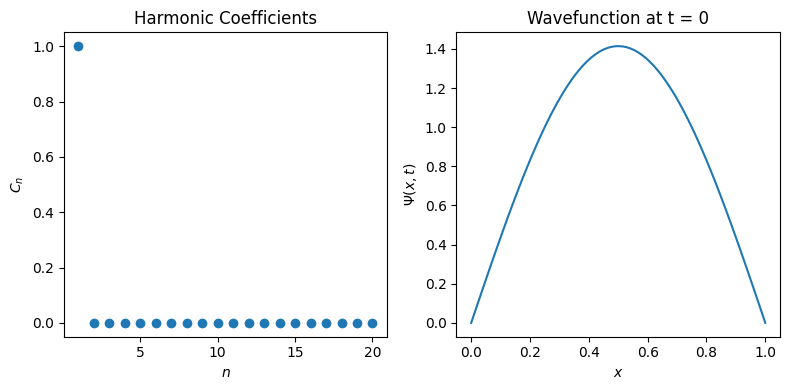

In [18]:
nPts = 100
t = 0

C_ns = [C_n(n, t) for n in range(1, n_harm + 1)]
xs = np.linspace(0, 1, nPts)
res = [wavefunction(x, t) for x in xs]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))
ax1.scatter(range(1, n_harm + 1), np.abs(C_ns)) 
ax1.set(xlabel="$n$", ylabel="$C_n$", title = "Harmonic Coefficients")
ax2.plot(xs, np.abs(res))
ax2.set(xlabel="$x$", ylabel="$\Psi(x, t)$", title = f"Wavefunction at t = {t}")
plt.tight_layout()

Here, I plot the harmonic coeffiecients and the wavefunction like we did in class for the strings. I tried different values of $t$ to make sure that my implementation is correct. I expect the wavefunction to remain unchanged as $t$ changes. 

Initally, there seemed to be a change in the wavefunction as $t$ changes. However, I realized that this was because the plots only showed the real part of the wavefunction. When I plot the absolute value of the wavefunction, I see that it does remains unchanged as $t$ changes.

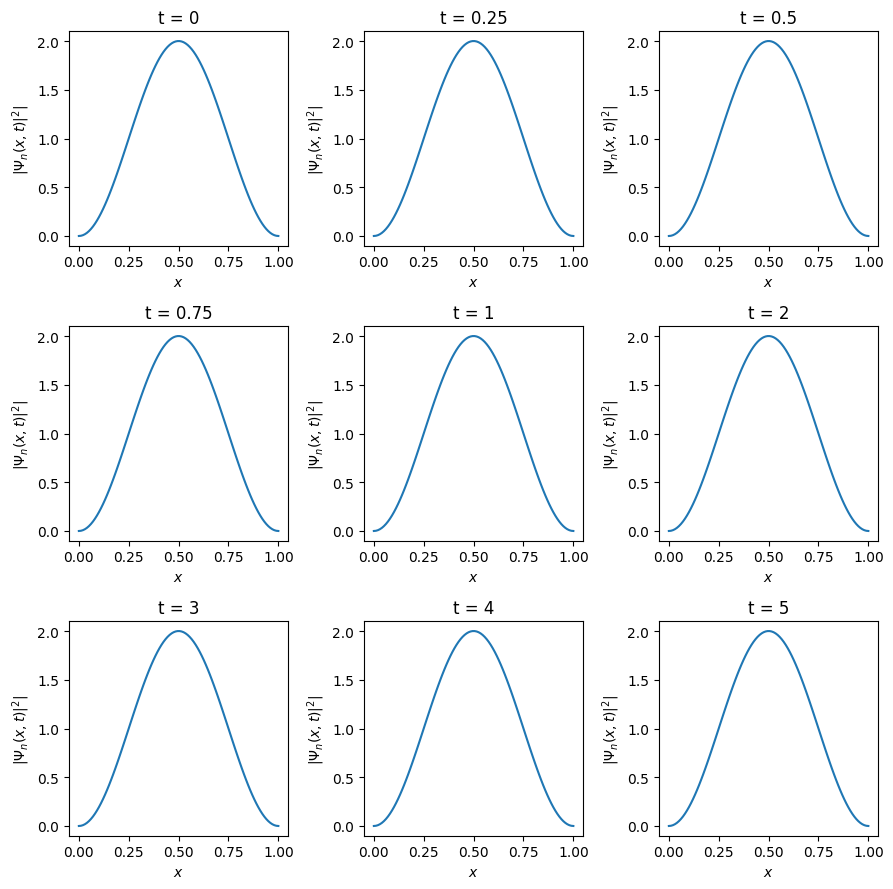

In [19]:
fig, axs = plt.subplots(3, 3, figsize=(9, 9))

nPts = 100
xs = np.linspace(0, 1, nPts)

ts = [0, 0.25, 0.5, 0.75, 1, 2, 3, 4, 5]
for i, t in enumerate(ts):
    ax = axs[int(i / 3), i % 3]
    res = [wavefunction(x, t) for x in xs]
    res = np.abs(res)**2
    ax.plot(xs, res)
    ax.set(xlabel = "$x$", ylabel = "$|\Psi_n(x,t)|^2|$", title = f"t = {t}")

plt.tight_layout()

Here is a plot of $|\Psi_n(x,t)|^2$ for different values of $t$. This shows that the probability distribution remains unchanged as $t$ changes, which is what we expect.

### Question 2
At $t= 0$, let $\Psi(x) = \frac{1}{\sigma\sqrt{2\pi}}\exp\left[-\frac{(x - 1/2)^2}{2\sigma^2} \right] - \frac{1}{\sigma\sqrt{2\pi}}\exp\left[-\frac{(0 - 1/2)^2}{2\sigma^2} \right]$. Keep $\sigma$ smaller than 1 (plot it to make sure the entire wavefunction is INSIDE the box).

Set $M = 1$ and calculate $c_n$'s. Show how $|\Psi_n(x,t)|^2$ changes in time. 

In [20]:
M = 1
n_harm = 20

sigma = 0.1
def initial_state(x):
    factor = 1 / (sigma * np.sqrt(2 * np.pi))
    exp_power = lambda x: -(x - 0.5)**2/(2 * sigma**2)
    return factor * np.exp(exp_power(x)) - factor * np.exp(exp_power(0))

Here, only the `initial_state` function needs to be redifined based on the given expression. I set `sigma` to $0.1$ to strike a balance between being too small and requiring too many harmonics to represent the wavefunction. 

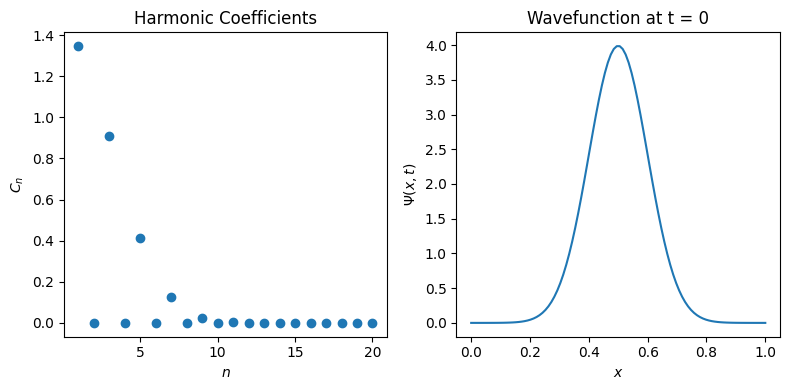

In [21]:
nPts = 100
t = 0

C_ns = [C_n(n, t) for n in range(1, n_harm + 1)]
xs = np.linspace(0, 1, nPts)
res = [wavefunction(x, t) for x in xs]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))
ax1.scatter(range(1, n_harm + 1), np.abs(C_ns)) 
ax1.set(xlabel="$n$", ylabel="$C_n$", title = "Harmonic Coefficients")
ax2.plot(xs, np.abs(res))
ax2.set(xlabel="$x$", ylabel="$\Psi(x, t)$", title = f"Wavefunction at t = {t}")
plt.tight_layout()

Once again, I plot the harmonic coeffiecients and the wavefunction. For this initial state function, there are more harmonics than just the first one being represented and the wavefunction does change for different values of $t$. Additionally, the entire wavefunction is inside the box so the chosen value for `sigma` is appropriate.

/home/vibilanj/.local/lib/python3.10/site-packages/matplotlib/collections.py:193: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


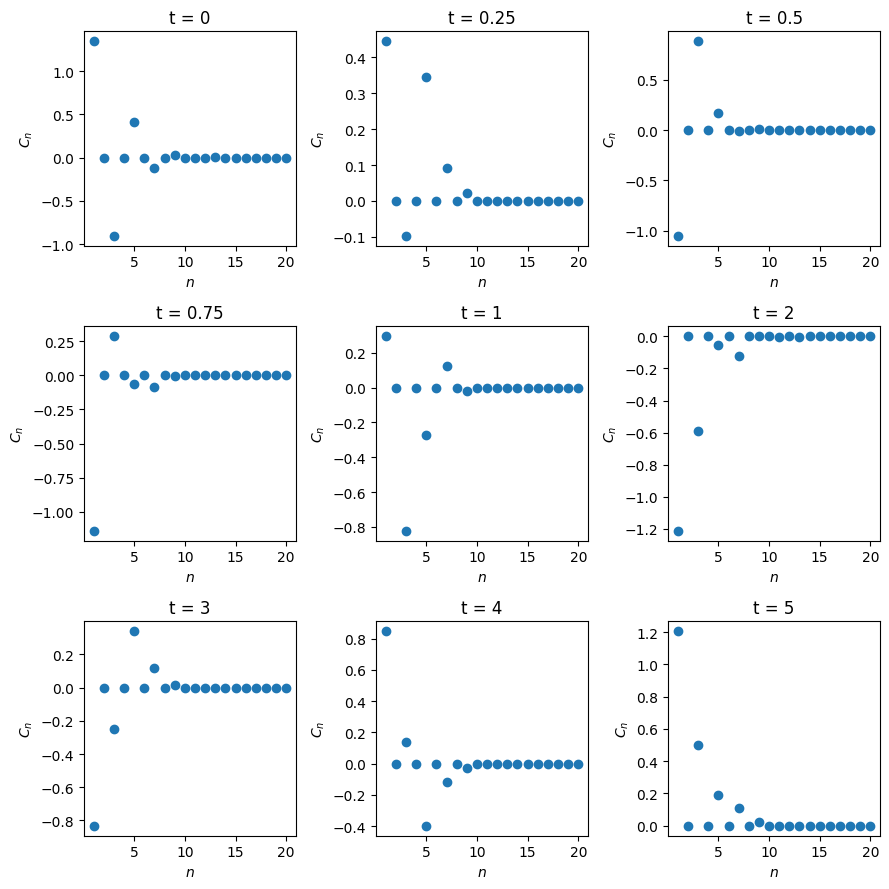

In [22]:
fig, axs = plt.subplots(3, 3, figsize=(9, 9))

ts = [0, 0.25, 0.5, 0.75, 1, 2, 3, 4, 5]
for i, t in enumerate(ts):
    ax = axs[int(i / 3), i % 3]
    C_ns = [C_n(n, t) for n in range(1, n_harm + 1)]
    ax.scatter(range(1, n_harm + 1), C_ns)
    ax.set(xlabel = "$n$", ylabel = "$C_n$", title = f"t = {t}")

plt.tight_layout()

Here are the plots of the harmonic coefficients for different values of $t$. The number of harmonics seems sufficient and for different values of $t$, the harmonic coefficients vary but they have the same absolute weights (checked by plotting the `np.abs(C_ns)`).

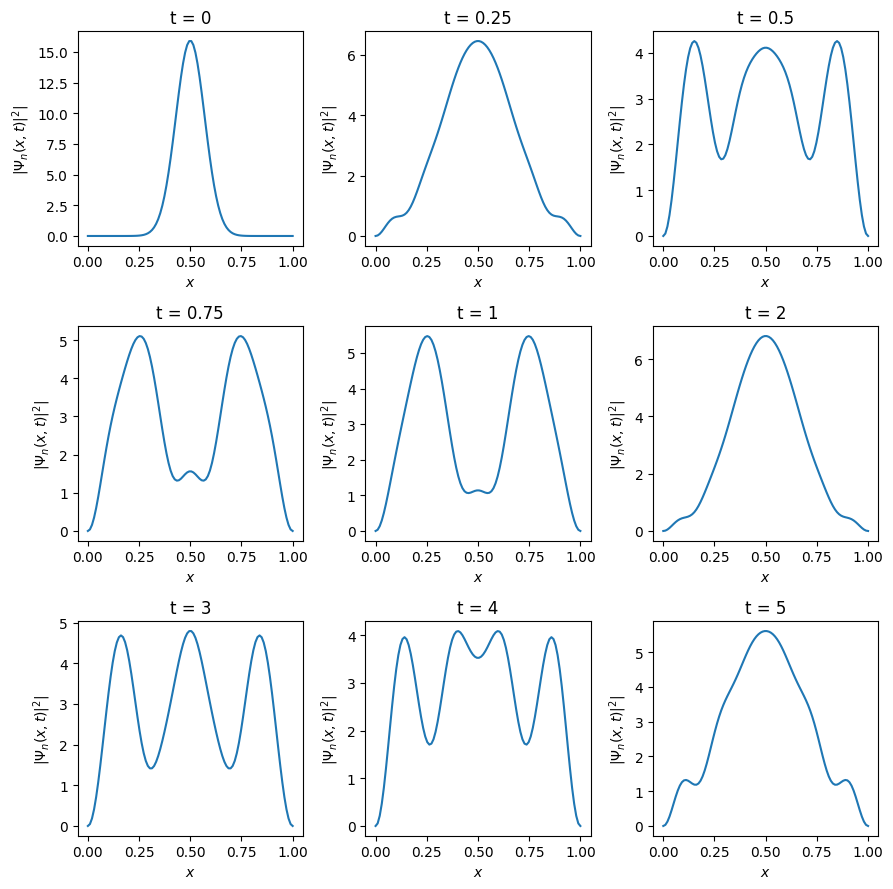

In [23]:
fig, axs = plt.subplots(3, 3, figsize=(9, 9))

nPts = 100
xs = np.linspace(0, 1, nPts)

ts = [0, 0.25, 0.5, 0.75, 1, 2, 3, 4, 5]
for i, t in enumerate(ts):
    ax = axs[int(i / 3), i % 3]
    res = [wavefunction(x, t) for x in xs]
    res = np.abs(res)**2
    ax.plot(xs, res)
    ax.set(xlabel = "$x$", ylabel = "$|\Psi_n(x,t)|^2|$", title = f"t = {t}")

plt.tight_layout()

Here is a plot of $|\Psi_n(x,t)|^2$ for different values of $t$. This shows that the probability distribution does change for different values of $t$ as expected.

### Question 3

Play with $M$. How does the system's evolution with time change with $M$?

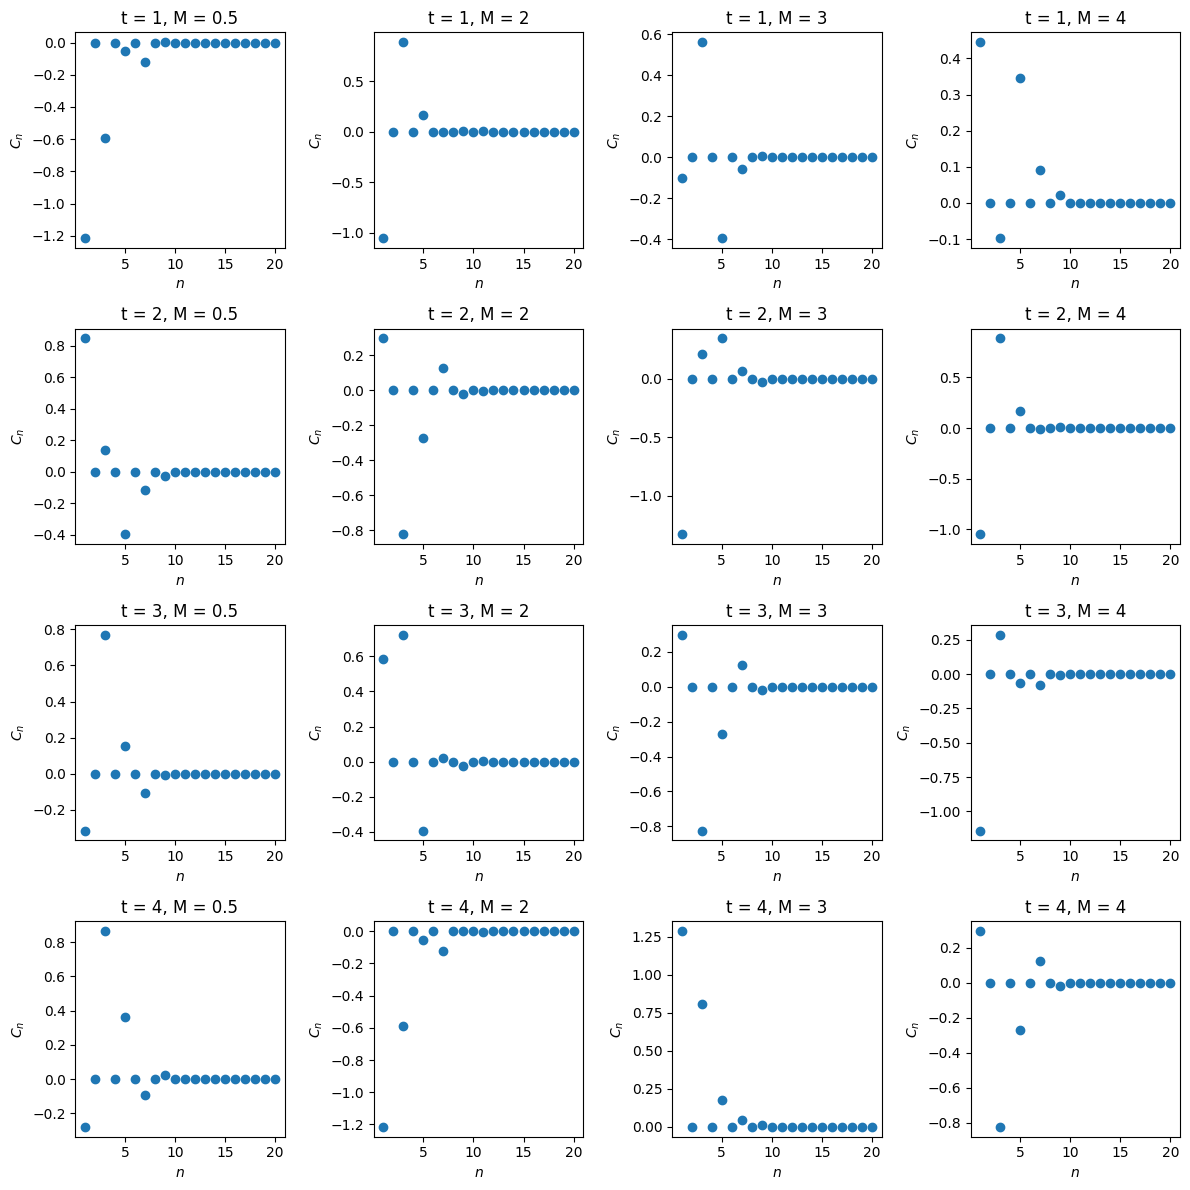

In [24]:
fig, axs = plt.subplots(4, 4, figsize=(12, 12))

ts = [1, 2, 3, 4]
Ms = [0.5, 2, 3, 4]

for i, t in enumerate(ts):
    for j, _M in enumerate(Ms):
        ax = axs[i,j]
        M = _M
        C_ns = [C_n(n, t) for n in range(1, n_harm + 1)]
        ax.scatter(range(1, n_harm + 1), C_ns)
        ax.set(xlabel = "$n$", ylabel = "$C_n$", title = f"t = {t}, M = {_M}")

plt.tight_layout()

Here are the plots of the harmonic coefficients for different combinations of $t$ and $M$. The number of harmonics seems sufficient and for different values of $t$, the harmonic coefficients vary but they have the same absolute weights (checked by plotting the `np.abs(C_ns)`). 

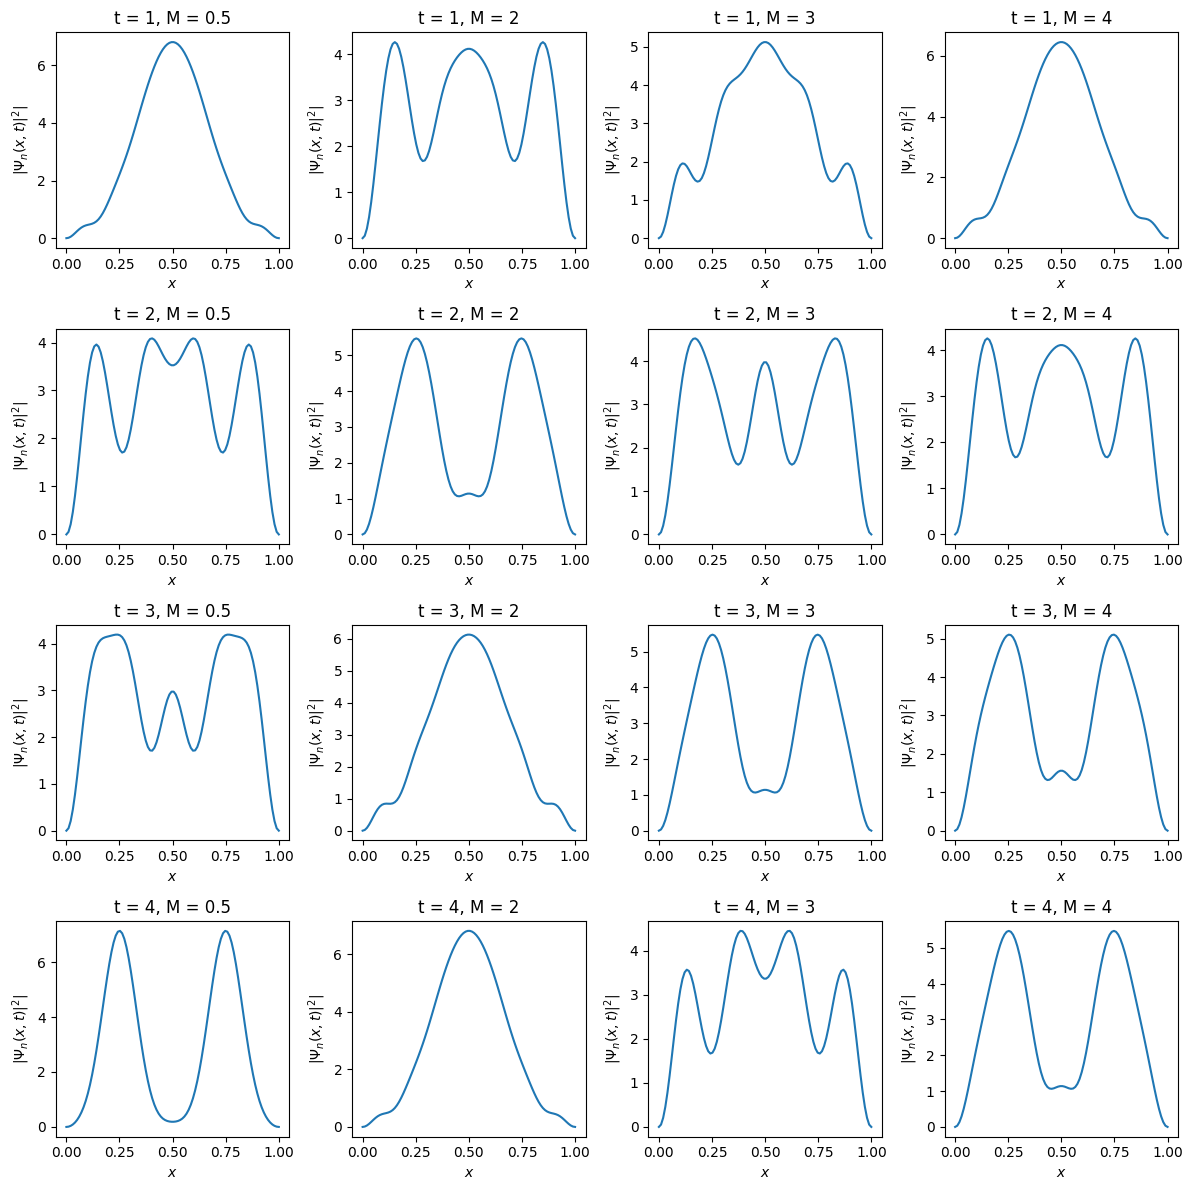

In [25]:
fig, axs = plt.subplots(4, 4, figsize=(12, 12))

nPts = 100
xs = np.linspace(0, 1, nPts)

ts = [1, 2, 3, 4]
Ms = [0.5, 2, 3, 4]

for i, t in enumerate(ts):
    for j, _M in enumerate(Ms):
        ax = axs[i,j]
        M = _M
        res = [wavefunction(x, t) for x in xs]
        res = np.abs(res)**2
        ax.plot(xs, res)
        ax.set(xlabel = "$x$", ylabel = "$|\Psi_n(x,t)|^2|$", title = f"t = {t}, M = {_M}")

plt.tight_layout()

Here are the plots of $|\Psi_n(x, t)|^2$ for different combinations of $t$ and $M$. As expected, we see that when $M$ changes, the wavefunction changes as well (in addition to changing with $t$). However, it is hard to see exactly how the wavefunction changes with $M$.

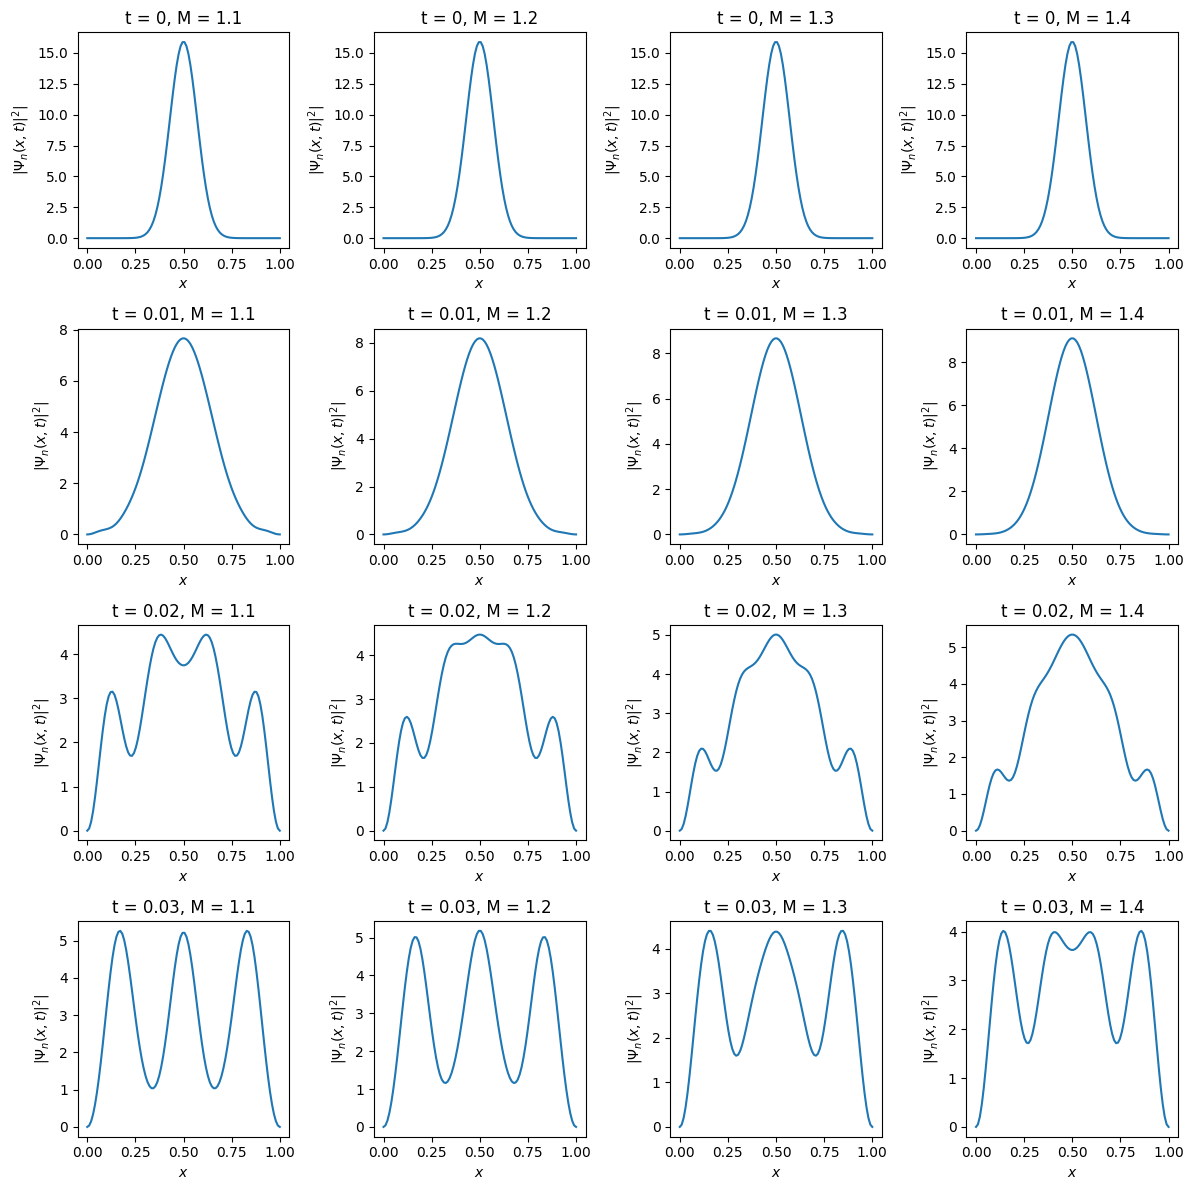

In [26]:
fig, axs = plt.subplots(4, 4, figsize=(12, 12))

nPts = 100
xs = np.linspace(0, 1, nPts)

ts = [0, 0.01, 0.02, 0.03]
Ms = [1.1, 1.2, 1.3, 1.4]

for i, t in enumerate(ts):
    for j, _M in enumerate(Ms):
        ax = axs[i,j]
        M = _M
        res = [wavefunction(x, t) for x in xs]
        res = np.abs(res)**2
        ax.plot(xs, res)
        ax.set(xlabel = "$x$", ylabel = "$|\Psi_n(x,t)|^2|$", title = f"t = {t}, M = {_M}")

plt.tight_layout()

This is the same plot as the one before but I use values of $t$ and $M$ that are much closer together to see how $M$ impacts the wavefunction. As the $M$ value increases, the wavefunction seems to have rounder peaks and troughs. It could be that $M$ represents the mass of the particle and so, when the $M$ increases, the energy levels decrease and the wavefunction becomes more spread out.